<a href="https://colab.research.google.com/github/rroszczyk/Python/blob/master/szyfry/szyfry_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# przygotowanie katalogu roboczego do pracy :)
import requests

def pobierzPlik(url, nazwaPliku):
    req = requests.get(url, stream=True)
    with open(nazwaPliku, 'wb') as uchwytPliku:
        for chunk in req.iter_content():
            uchwytPliku.write(chunk)

nazwyPlikow = ['alice.txt', 'pan_tadeusz.txt']
for nazwa in nazwyPlikow:
  pobierzPlik("https://github.com/rroszczyk/Python/raw/master/Pliki/"+nazwa, nazwa)

In [12]:
def zlicz_litery(nazwa_pliku):
  with open(nazwa_pliku) as plik:
    tresc = plik.read()
    tresc = tresc.upper()
  print(len(tresc))

  alfabet = [chr(ch) for ch in list(range(ord('A'), ord('Z') + 1))]
  slownik = {x: 0 for x in alfabet}

  cnt = 0
  for ch in tresc:
    if (ch in slownik):
      slownik[ch] = slownik[ch] + 1
      cnt = cnt + 1

  for s in slownik:
    slownik[s] = (slownik[s] / cnt) * 100
  
  print(slownik)
  return slownik

163781
{'A': 7.969818439047395, 'B': 1.419639154721154, 'C': 2.4392425338851442, 'D': 4.446739139272618, 'E': 12.517379603053932, 'F': 1.9367585719048046, 'G': 2.3928969257413266, 'H': 6.414394783273301, 'I': 7.019326931676817, 'J': 0.19107399848766962, 'K': 1.048874289570612, 'L': 4.236964281358495, 'M': 2.005870443698217, 'N': 6.546113880103098, 'O': 7.7055671645431705, 'P': 1.6001431022286547, 'Q': 0.1788777858182439, 'R': 5.374464382993601, 'S': 5.909471578759076, 'T': 9.919586304466254, 'U': 3.234435599931701, 'V': 0.7829968533771313, 'W': 2.400214653342982, 'X': 0.14310222865459513, 'Y': 2.1010009025197376, 'Z': 0.06504646757027052}
Alicja w krainie czarów


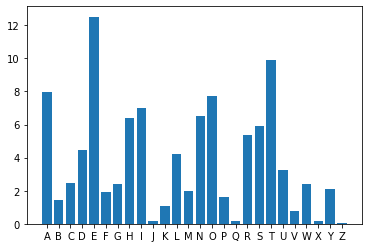

447032
{'A': 9.82568682001093, 'B': 1.9617218937850862, 'C': 4.563689204630136, 'D': 3.728761985195489, 'E': 7.873900839584678, 'F': 0.1338243330518158, 'G': 1.5931616076307813, 'H': 1.3084355904416514, 'I': 9.35435193005117, 'J': 2.2712876943713054, 'K': 4.045779720800835, 'L': 2.165408117641214, 'M': 3.3723110934472653, 'N': 5.0545854240151025, 'O': 7.329288588603508, 'P': 2.883588355109543, 'Q': 0.0006209945849272194, 'R': 4.907409707387352, 'S': 5.0548959213075655, 'T': 3.6396492622584335, 'U': 2.446408167320781, 'V': 0.003104972924636097, 'W': 4.926350042227632, 'X': 0.0009314918773908292, 'Y': 4.258159868845944, 'Z': 7.296686372894828}
Pan Tadeusz


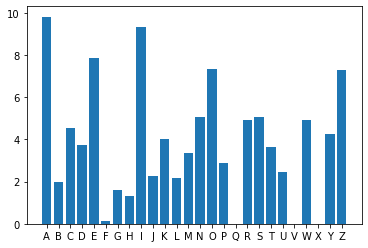

In [15]:
slownik = zlicz_litery('alice.txt')
print('Alicja w krainie czarów')
plt.bar(list(slownik.keys()), slownik.values())
plt.show()

slownik = zlicz_litery('pan_tadeusz.txt')
print('Pan Tadeusz')
plt.bar(list(slownik.keys()), slownik.values())
plt.show()

In [18]:
def cezar(tekst, p):
  wynik = ''
  tekst = tekst.upper()

  for i in range(len(tekst)):
    ch = tekst[i]
    wynik = wynik + chr((ord(ch) + p - 65) % 26 + 65)

  return wynik


In [19]:
print(cezar('tekst do sprawdzenia', 10))

DOUCDDNYDCZBKGNJOXSK


In [22]:
for i in range(26):
  print(f"{26-i}:{i} {cezar('DOUCDDNYDCZBKGNJOXSK', i)}")

26:0 DOUCDDNYDCZBKGNJOXSK
25:1 EPVDEEOZEDACLHOKPYTL
24:2 FQWEFFPAFEBDMIPLQZUM
23:3 GRXFGGQBGFCENJQMRAVN
22:4 HSYGHHRCHGDFOKRNSBWO
21:5 ITZHIISDIHEGPLSOTCXP
20:6 JUAIJJTEJIFHQMTPUDYQ
19:7 KVBJKKUFKJGIRNUQVEZR
18:8 LWCKLLVGLKHJSOVRWFAS
17:9 MXDLMMWHMLIKTPWSXGBT
16:10 NYEMNNXINMJLUQXTYHCU
15:11 OZFNOOYJONKMVRYUZIDV
14:12 PAGOPPZKPOLNWSZVAJEW
13:13 QBHPQQALQPMOXTAWBKFX
12:14 RCIQRRBMRQNPYUBXCLGY
11:15 SDJRSSCNSROQZVCYDMHZ
10:16 TEKSTTDOTSPRAWDZENIA
9:17 UFLTUUEPUTQSBXEAFOJB
8:18 VGMUVVFQVURTCYFBGPKC
7:19 WHNVWWGRWVSUDZGCHQLD
6:20 XIOWXXHSXWTVEAHDIRME
5:21 YJPXYYITYXUWFBIEJSNF
4:22 ZKQYZZJUZYVXGCJFKTOG
3:23 ALRZAAKVAZWYHDKGLUPH
2:24 BMSABBLWBAXZIELHMVQI
1:25 CNTBCCMXCBYAJFMINWRJ


TEKSTDOZAKODOWANIA -> TOOEZWKAASKNTOIDDA

```
TEKSTD
OZAKOD
OWANIA
```

In [28]:
def transpozycja(tekst, klucz):
  wynik = ''
  dlugosc = int(len(tekst) / klucz)
  for i in range(klucz):
    for j in range(dlugosc):
      idx = (j * klucz + (i + 1)) - 1
      wynik = wynik + tekst[idx]
  return (wynik, dlugosc)

In [30]:
print(transpozycja('TEKSTDOZAKODOWANIA', 6))

print(transpozycja('TOOEZWKAASKNTOIDDA', 3))

('TOOEZWKAASKNTOIDDA', 3)
('TEKSTDOZAKODOWANIA', 6)
